# Final Project: BD524 - Advanced Big Data Analytics
## Deep Learning and Neural Networks
---
```bash
Author: Witchakorn Wanasanwongkot
StudentID: 65130459
College of Innovative Technology and Engineering, Dhurakij Pundit University
```
---
![](https://images.unsplash.com/photo-1664447972862-e26efc5b709f?ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D&auto=format&fit=crop&w=1332&q=80)

*Image source: [Unsplash](https://unsplash.com/photos/Krw-2KP7bOE)*

### Introduction
**Context:**

Image classification is a fundamental task in computer vision that aims to categorize images into different classes or labels. It has a wide range of applications, including object recognition, visual search, medical diagnosis, autonomous vehicles, and more. Convolutional Neural Networks (CNNs) have emerged as a powerful and effective technique for image classification due to their ability to automatically learn and extract meaningful features from raw image data. 

In this project, our goal is to use deep learning techniques, specifically CNNs, to accurately classify and label different types of images. By leveraging the power of these neural networks, we can teach computers to recognize and understand images more like humans do.

**Content:**
- Prepare and process data for artificial neural networks.
- Build and train artificial neural networks (ANNs).
- Build and train convolutional neural networks (CNNs).
- Implement fine-tuning and transfer learning techniques using the pre-trained models *VGG-16* and *MobileNet*.
- Data Augmentation

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, BatchNormalization, Conv2D, MaxPool2D
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import ConfusionMatrixDisplay
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
phyical_devices = tf.config.experimental.list_physical_devices('GPU')
print("Num GPUs Available:", len(phyical_devices))
tf.config.experimental.set_memory_growth(phyical_devices[0], True)

Num GPUs Available: 1


## Data Preparation
### Kaggle Cats and Dogs Dataset
Link: https://www.microsoft.com/en-us/download/details.aspx?id=54765

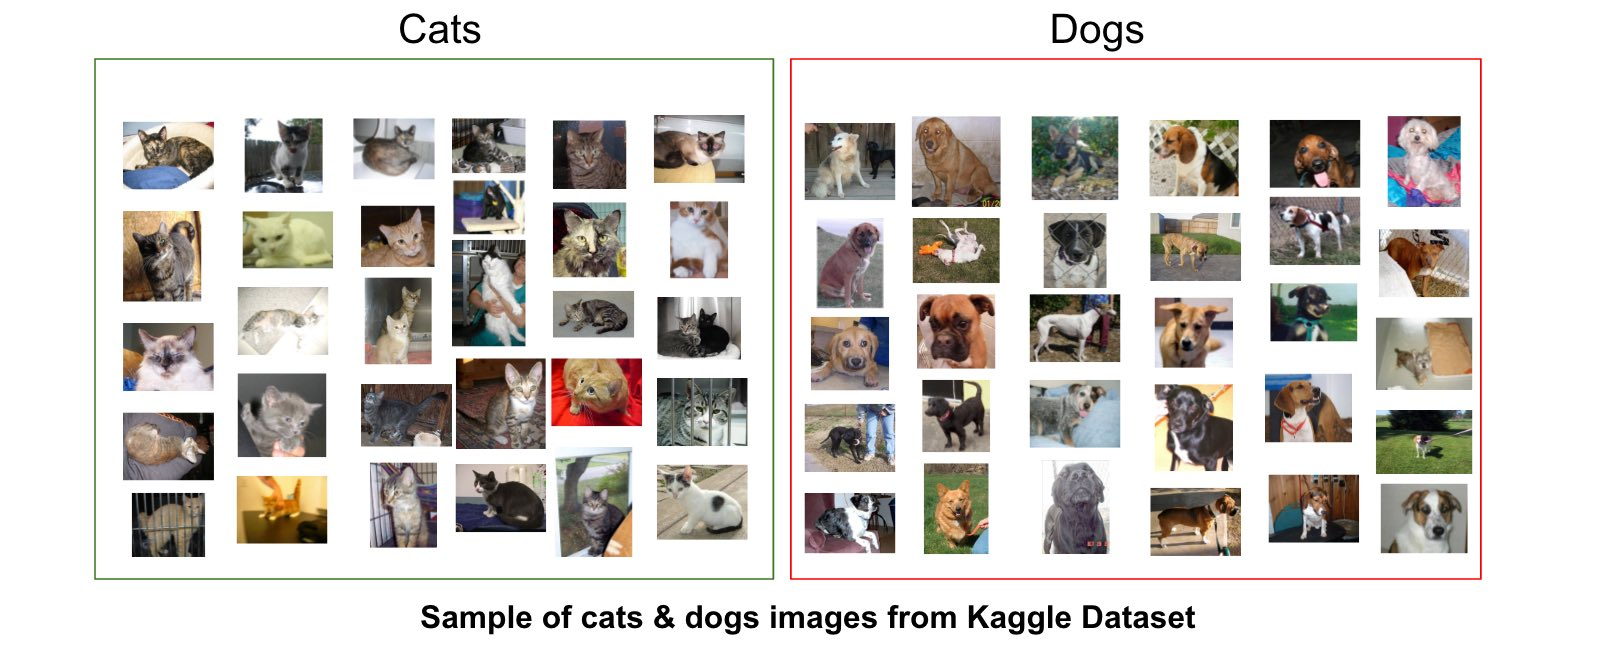

*Image Source: [Adil Moujahid](https://adilmoujahid.com/posts/2016/06/introduction-deep-learning-python-caffe/)*

### Organize the data

In [18]:
# Organize data into train, valid, test directories
os.chdir('data/dogs-vs-cats/')
if os.path.isdir('train/dog') is False:
    os.makedirs('train/dog')
    os.makedirs('train/cat')
    os.makedirs('valid/dog')
    os.makedirs('valid/cat')
    os.makedirs('test/dog')
    os.makedirs('test/cat')

    # Train set
    for c in random.sample(glob.glob('cat*'), 500):
        shutil.move(c, 'train/cat')
    for c in random.sample(glob.glob('dog*'), 500):
        shutil.move(c, 'train/dog')
    # Valid set
    for c in random.sample(glob.glob('cat*'), 100):
        shutil.move(c, 'valid/cat')
    for c in random.sample(glob.glob('dog*'), 100):
        shutil.move(c, 'valid/dog')
    # Test set
    for c in random.sample(glob.glob('cat*'), 50):
        shutil.move(c, 'test/cat')
    for c in random.sample(glob.glob('dog*'), 50):
        shutil.move(c, 'test/dog')

os.chdir('../../')

### Process the data

In [9]:
# Define the path to the training, validation, and test datasets
train_path = 'data/dogs-vs-cats/train'
valid_path = 'data/dogs-vs-cats/valid'
test_path = 'data/dogs-vs-cats/test'

# Create batches of preprocessed images for training, validation, and testing using the VGG16 preprocessing function
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=train_path, target_size=(224,224), classes=['cat', 'dog'], batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=valid_path, target_size=(224,224), classes=['cat', 'dog'], batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=test_path, target_size=(224,224), classes=['cat', 'dog'], batch_size=10, shuffle=False)

Found 1000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


## Build a CNN model
### The architecture of Convolutional Neural Network (CNN)
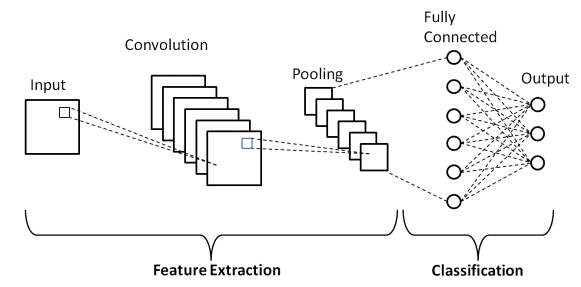

*Image Source: [upGrade](https://www.upgrad.com/blog/basic-cnn-architecture/)*

A Convolutional Neural Network (CNN) is a type of deep learning architecture specifically designed for processing and analyzing visual data, such as images or videos. CNNs have revolutionized computer vision tasks by `achieving remarkable performance in tasks like image classification, object detection, and image segmentation`.

The basic building blocks of a CNN architecture include convolutional layers, pooling layers, and fully connected layers. Here is a brief description of each component:

1. **Convolutional Layers**: Convolutional layers are responsible for `learning and extracting features from input data`. They consist of multiple filters or kernels that convolve (slide) over the input image, applying element-wise multiplications and summations. This process captures local patterns and spatial hierarchies of features. Each filter `detects specific visual patterns, such as edges, textures, or shapes`.

2. **Pooling Layers**: Pooling layers `downsample the spatial dimensions of the features` extracted by convolutional layers. They `reduce the computational complexity` and make the learned features more robust to spatial variations. The most common type of pooling is max pooling, which takes the maximum value within each pooling region.

3. **Fully Connected Layers**: Fully connected layers are typically placed at the end of the CNN architecture. They `connect all the neurons from the previous layer to every neuron in the current layer`, forming a traditional neural network structure. These layers are responsible for the final classification or regression tasks based on the learned features from previous layers.

CNN architectures often incorporate additional layers or techniques to improve performance, such as:

- **Activation Functions**: Activation functions play a crucial role in `introducing non-linearity to the Convolutional Neural Network (CNN) architecture`. 

    >Commonly used activation functions in CNNs include *ReLU (Rectified Linear Unit)*, which sets negative values to zero, and *softmax*, which is often applied in the final layer for multi-class classification tasks. 

    Softmax activation function `normalizes the outputs of the previous layer into a probability distribution`, assigning probabilities to each class and enabling the model to make predictions. It ensures that the predicted class probabilities sum up to one, making it suitable for multi-class classification problems.

- **Dropout**: Dropout regularization `randomly deactivates a fraction of neurons` during training, preventing overfitting and improving generalization.

- **Batch Normalization**: Batch normalization `normalizes the inputs of each layer` to accelerate training and improve the stability of the neural network.

- **Skip Connections**: Skip connections `allow the network to learn both shallow and deep features by bypassing certain layers`. This technique is commonly used in architectures like ResNet and DenseNet.

In [11]:
# Create a sequential model
model = Sequential([
    # Convolutional layer with 32 filters, a 3x3 kernel, ReLU activation, and same padding
    Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same', input_shape=(224,224,3)),
    # Max pooling layer with a 2x2 pool size and stride of 2
    MaxPool2D(pool_size=(2,2), strides=2),
    # Convolutional layer with 64 filters, a 3x3 kernel, ReLU activation, and same padding
    Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'),
    # Max pooling layer with a 2x2 pool size and stride of 2
    MaxPool2D(pool_size=(2,2), strides=2),
    # Flatten layer to convert the 2D feature maps into a 1D feature vector
    Flatten(),
    # Fully connected (dense) layer with 2 units and softmax activation for classification
    Dense(units=2, activation='softmax')
])

# Print a summary of the model's architecture
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 112, 112, 32)     0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 200704)            0         
                                                                 
 dense_1 (Dense)             (None, 2)                

### Predict the data

In [12]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
model.fit(x=train_batches, validation_data=valid_batches, epochs=10, verbose=2)

Epoch 1/10
100/100 - 13s - loss: 13.7411 - accuracy: 0.5820 - val_loss: 4.8026 - val_accuracy: 0.6000 - 13s/epoch - 133ms/step
Epoch 2/10
100/100 - 3s - loss: 2.3295 - accuracy: 0.7810 - val_loss: 3.0270 - val_accuracy: 0.5850 - 3s/epoch - 31ms/step
Epoch 3/10
100/100 - 3s - loss: 0.3667 - accuracy: 0.9240 - val_loss: 2.6255 - val_accuracy: 0.6450 - 3s/epoch - 31ms/step
Epoch 4/10
100/100 - 3s - loss: 0.0792 - accuracy: 0.9730 - val_loss: 2.5180 - val_accuracy: 0.6250 - 3s/epoch - 31ms/step
Epoch 5/10
100/100 - 3s - loss: 0.0514 - accuracy: 0.9860 - val_loss: 2.6500 - val_accuracy: 0.6300 - 3s/epoch - 31ms/step
Epoch 6/10
100/100 - 3s - loss: 0.0048 - accuracy: 0.9990 - val_loss: 2.5742 - val_accuracy: 0.6400 - 3s/epoch - 31ms/step
Epoch 7/10
100/100 - 3s - loss: 0.0014 - accuracy: 1.0000 - val_loss: 2.6171 - val_accuracy: 0.6300 - 3s/epoch - 32ms/step
Epoch 8/10
100/100 - 3s - loss: 8.2070e-04 - accuracy: 1.0000 - val_loss: 2.6036 - val_accuracy: 0.6450 - 3s/epoch - 33ms/step
Epoch 9/

#### Summary
The model achieves 100% perfect accuracy on the training dataset, but its performance on the validation dataset is consistent yet lower, with an accuracy around 64%, indicating that `the model may not be generalizing well to unseen data.`

*There are two potential choices to improve the model's performance:*

1) **Self Hyperparameter Tuning:** This involves `adjusting the hyperparameters of the model`, such as learning rate, batch size, optimizer, or network architecture, to find the optimal configuration for your specific task.

2) **Using Pre-trained Model from ImageNet:**  Another option is to `leverage the power of pre-trained models that have been trained on large-scale datasets like ImageNet`. These models have already learned rich representations from diverse images, which can be useful for various computer vision tasks. By using transfer learning, `you can take a pre-trained model and fine-tune it on your specific dataset`. This approach can save training time and potentially improve the model's performance by leveraging the pre-trained model's learned features.

## Build a Fine-tuned `VGG16` model
### The architecture of VGG-16 model
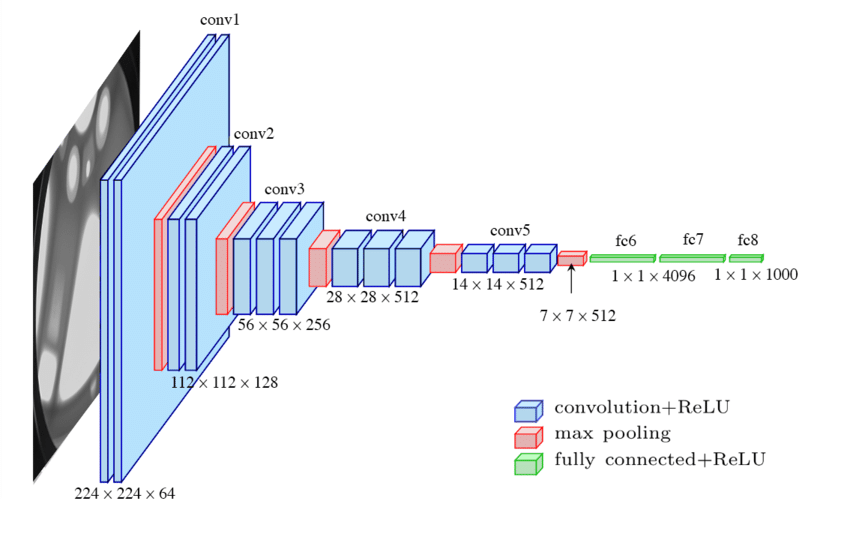

*Image Source: [ResearchGate](https://www.researchgate.net/figure/Fig-A1-The-standard-VGG-16-network-architecture-as-proposed-in-32-Note-that-only_fig3_322512435)*

A fine-tuned VGG16 model refers to a modified version of the VGG16 model that has been pretrained on a large dataset (typically ImageNet) and then further trained on a specific task or dataset of interest. The VGG16 model is `a deep convolutional neural network architecture that has achieved high performance in image classification tasks`.

During the fine-tuning process, the pre-trained VGG16 model's weights and parameters are retained up to a certain layer (often the convolutional layers), while `the fully connected layers at the end of the network are replaced or modified to adapt to the new task`. By keeping the initial layers fixed and training only the latter layers, `the model can learn task-specific features from a smaller, more specialized dataset`.

Fine-tuning a VGG16 model allows for leveraging the knowledge and representation learned from the pre-training on a large-scale dataset, which can help to improve the performance and efficiency of the model for the specific task or dataset at hand. It enables transfer learning, where the model's general image understanding capabilities are transferred to a new domain or task with less available training data. `Fine-tuning can be particularly useful when working with limited data` or when `training a model from scratch would be time-consuming or computationally expensive`.

In [42]:
# Load the Fine-tuned VGG16 model with pre-trained weights (excluding the top layers)
vgg16_model = tf.keras.applications.vgg16.VGG16(input_shape=(224,224,3), include_top=False)

In [48]:
# Create a new sequential model
model = Sequential()

# Add all the layers from the VGG16 model to the new sequential model
for layer in vgg16_model.layers:
    model.add(layer)
# Flatten layer to convert the 2D feature maps into a 1D feature vector
model.add(Flatten())

# Print a summary of the model's architecture
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)     

In [49]:
# Freeze (set trainable to False) all layers in the model to keep the pre-trained weights fixed
for layer in model.layers:
    layer.trainable = False

In [50]:
# Add a new dense (fully connected) layer with 2 units and softmax activation for classification
model.add(Dense(units=2, activation='softmax'))

# Print a summary of the model's architecture after adding the dense layer
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)     

### Train a model

In [51]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [52]:
model.fit(x=train_batches, validation_data=valid_batches, epochs=5, verbose=2)

Epoch 1/5
100/100 - 13s - loss: 1.9280 - accuracy: 0.8630 - val_loss: 0.3086 - val_accuracy: 0.9700 - 13s/epoch - 132ms/step
Epoch 2/5
100/100 - 11s - loss: 0.0774 - accuracy: 0.9890 - val_loss: 0.3326 - val_accuracy: 0.9700 - 11s/epoch - 109ms/step
Epoch 3/5
100/100 - 11s - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.3466 - val_accuracy: 0.9750 - 11s/epoch - 113ms/step
Epoch 4/5
100/100 - 11s - loss: 8.2942e-05 - accuracy: 1.0000 - val_loss: 0.3455 - val_accuracy: 0.9750 - 11s/epoch - 114ms/step
Epoch 5/5
100/100 - 11s - loss: 4.0973e-05 - accuracy: 1.0000 - val_loss: 0.3441 - val_accuracy: 0.9750 - 11s/epoch - 115ms/step


### Summary
Overall, the model shows a decreasing trend in both training loss and validation loss, indicating that `it is effectively learning from the data`. The high training and validation accuracy suggest that `the model can successfully classify the images into the appropriate classes (cats and dogs)`.

### Predict the data

In [53]:
predictions = model.predict(x=test_batches, verbose=0)

In [60]:
predictions[:5]

array([[9.9999690e-01, 3.1218487e-06],
       [1.0000000e+00, 3.8225761e-20],
       [1.0000000e+00, 3.5621919e-34],
       [9.9999905e-01, 9.7874465e-07],
       [1.0000000e+00, 5.8253004e-23]], dtype=float32)

In [54]:
test_batches.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [55]:
test_batches.class_indices

{'cat': 0, 'dog': 1}

## Evaluate a model's performance

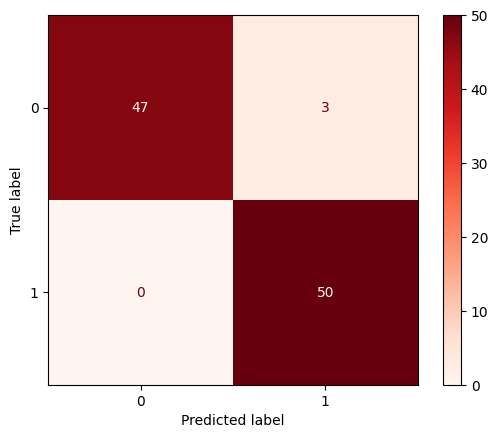

In [78]:
cm_plot_labels = ['cat', 'dog']

ConfusionMatrixDisplay.from_predictions(
    y_true=test_batches.classes,
    y_pred=np.argmax(predictions, axis=-1),
    cmap=plt.cm.Reds
);

### Summary
Looking at the confusion matrix, we can observe the following:
- TP (True Positive) = 50: This indicates that there were 50 instances where `the model correctly predicted an image as a dog (class 1) when it was actually a dog`.
- TN (True Negative) = 47: This indicates that there were 47 instances where `the model correctly predicted an image as a cat (class 0) when it was actually a cat`.
- FP (False Positive) = 3: This indicates that there were 3 instances where `the model incorrectly predicted an image as a dog (class 1) when it was actually a cat (class 0)`.
- FN (False Negative) = 0: This indicates that there were no instances where `the model incorrectly predicted an image as a cat (class 0) when it was actually a dog (class 1)`.

Overall, the model's performance seems quite good based on the provided confusion matrix. It achieved a high number of true positives (50) and true negatives (47), indicating that it correctly classified both cats and dogs. The absence of false negatives (fn = 0) indicates that the model did not mistakenly classify any dogs as cats. However, there were a few false positives (fp = 3), suggesting that the model mistakenly classified a small number of cats as dogs. 

*Note: To fully evaluate the model's performance, additional metrics such as precision, recall, and F1 score can be calculated.*

## Build a Fine-tuned `MobileNet` model
### The architecture of MobileNet-V1 model
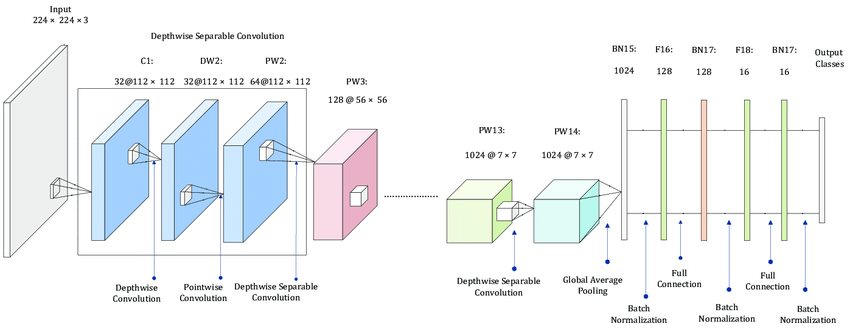

*Image Source: [ResearchGate](https://www.researchgate.net/figure/Improved-MobileNet-V1-Transfer-Learning-Model_fig2_352018519)*

A fine-tuned MobileNet model refers to a MobileNet architecture that has been pretrained on a large dataset (typically on a large-scale image classification task like ImageNet) and then further trained or fine-tuned on a more specific task or dataset.

MobileNet is a lightweight convolutional neural network architecture that is `optimized for mobile and embedded devices`. It consists of depthwise separable convolutions, which significantly reduce the number of parameters and computational complexity while maintaining good accuracy.

To fine-tune a MobileNet model, `the pre-trained weights learned from a large dataset are used as a starting point. The model is then further trained on a smaller, more specific dataset related to the target task`. Fine-tuning allows the model to adapt and learn more specialized features for the specific domain or dataset, potentially improving its performance.

During fine-tuning, `typically only a subset of the layers in the MobileNet architecture are trainable, while the earlier layers are often frozen or have their learning rates reduced`. This is done to retain the general features learned from the initial training and prevent overfitting on the smaller dataset.

Fine-tuning a MobileNet model can be advantageous when you have a limited amount of data specific to your task or domain. By starting with pre-trained weights and fine-tuning on your dataset, `you can leverage the general knowledge learned from a large dataset and apply it to your specific problem, potentially achieving better performance with less training data`.

In [42]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import Model
from keras.layers import Dense, Activation, GlobalAveragePooling2D
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.utils import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import imagenet_utils
from sklearn.metrics import ConfusionMatrixDisplay
import itertools
import os
import shutil
import random
import matplotlib.pyplot as plt

In [3]:
phyical_devices = tf.config.experimental.list_physical_devices('GPU')
print("Num GPUs Available:", len(phyical_devices))
tf.config.experimental.set_memory_growth(phyical_devices[0], True)

Num GPUs Available: 1


### Testing the MobileNet-V1 model with different kind of images
Link: https://pxhere.com/

In [5]:
# Load the MobileNet model with pre-trained weights
mobile = tf.keras.applications.mobilenet.MobileNet()

17225924/17225924 [==============================] - 4s 0us/step


In [12]:
# Prepare an image for prediction by loading, resizing, converting to array, and preprocessing it.
def prepare_image(file):
    img_path = 'data/MobileNet-samples/'
    img = load_img(img_path + file, target_size=(224,224))
    img_array = img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0) # Expand the dimensions to match the input shape of MobileNet
    return tf.keras.applications.mobilenet.preprocess_input(img_array_expanded_dims)

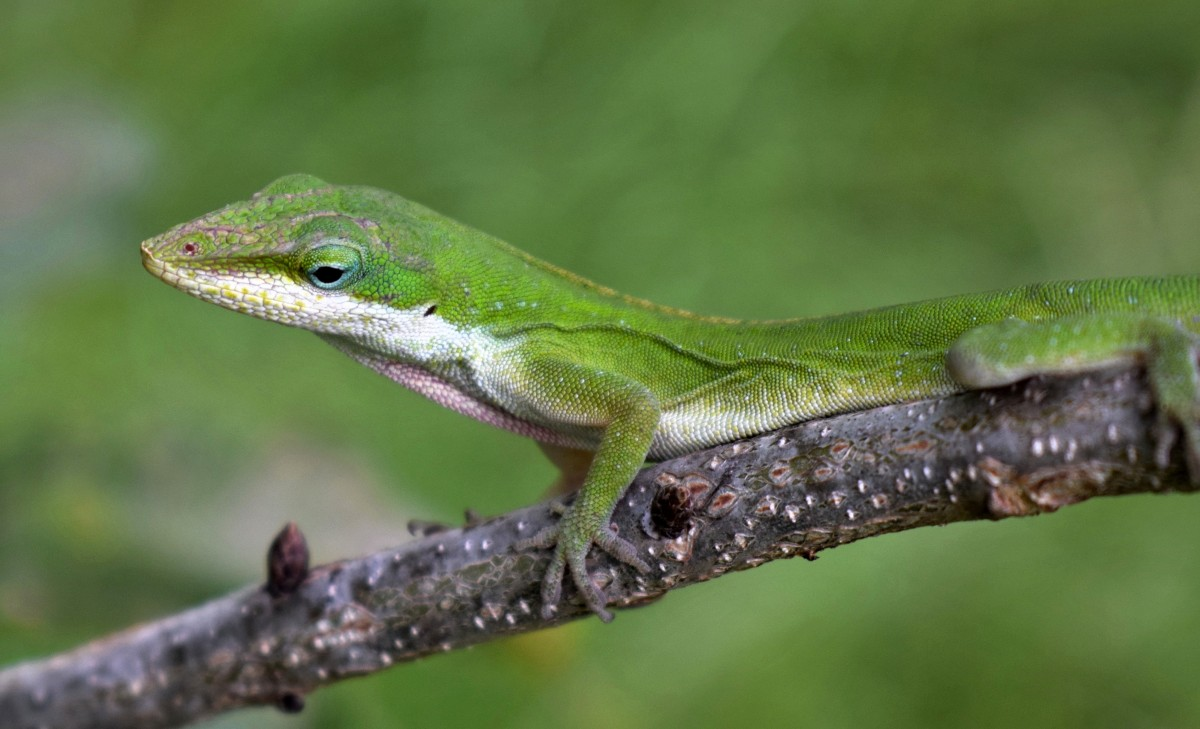

In [7]:
from IPython.display import Image
Image(filename='data/MobileNet-samples/1.jpg', width=300, height=200)

In [13]:
preprocessed_image = prepare_image('1.jpg')
predictions = mobile.predict(preprocessed_image)
results = imagenet_utils.decode_predictions(predictions)
results

1/1 [==============================] - 7s 7s/step


[[('n01682714', 'American_chameleon', 0.8061341),
  ('n01693334', 'green_lizard', 0.14932445),
  ('n01687978', 'agama', 0.03797744),
  ('n01689811', 'alligator_lizard', 0.0032327436),
  ('n01685808', 'whiptail', 0.0019043797)]]

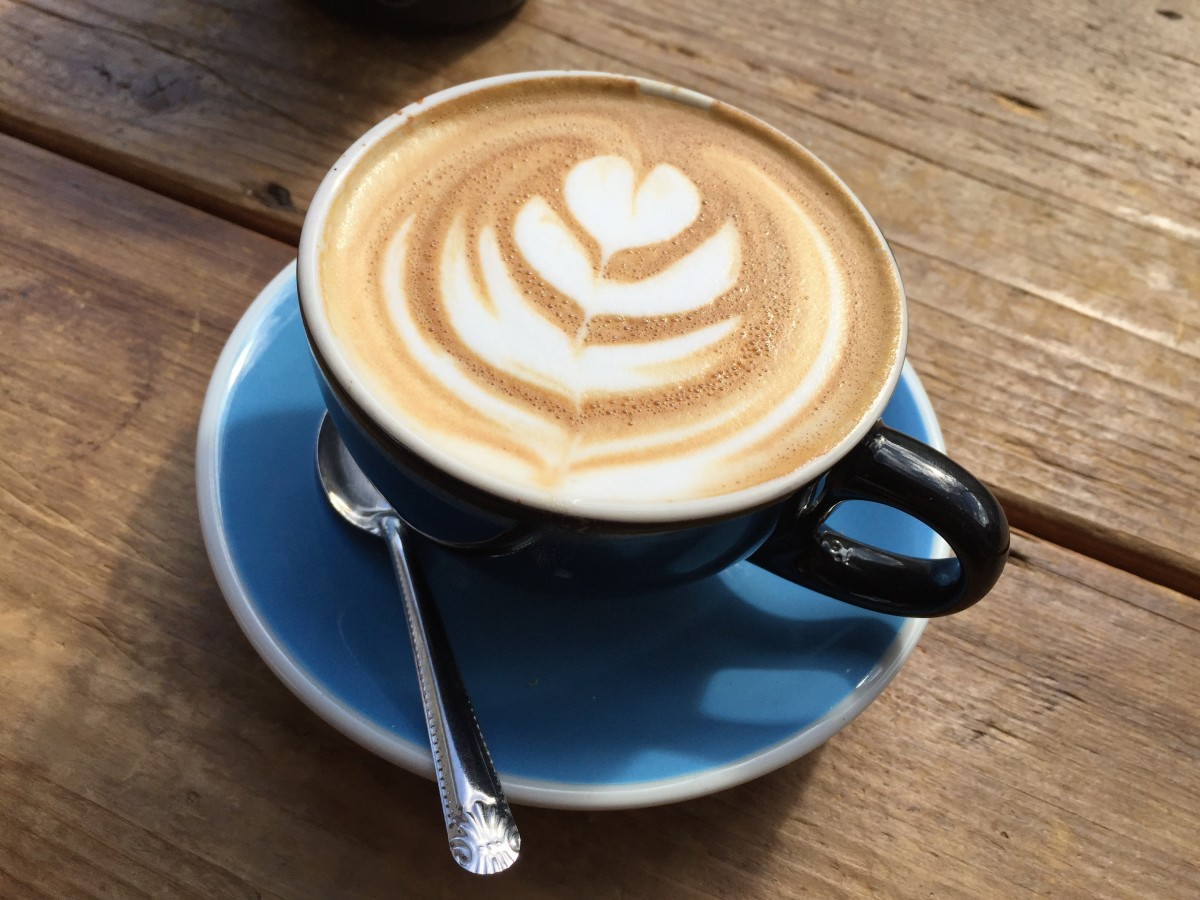

In [14]:
Image(filename='data/MobileNet-samples/2.jpg', width=300, height=200)

In [15]:
preprocessed_image = prepare_image('2.jpg')
predictions = mobile.predict(preprocessed_image)
results = imagenet_utils.decode_predictions(predictions)
results

1/1 [==============================] - 0s 30ms/step


[[('n07920052', 'espresso', 0.9848973),
  ('n07932039', 'eggnog', 0.0060337423),
  ('n01944390', 'snail', 0.0008134319),
  ('n03063599', 'coffee_mug', 0.0006203538),
  ('n04263257', 'soup_bowl', 0.00058099325)]]

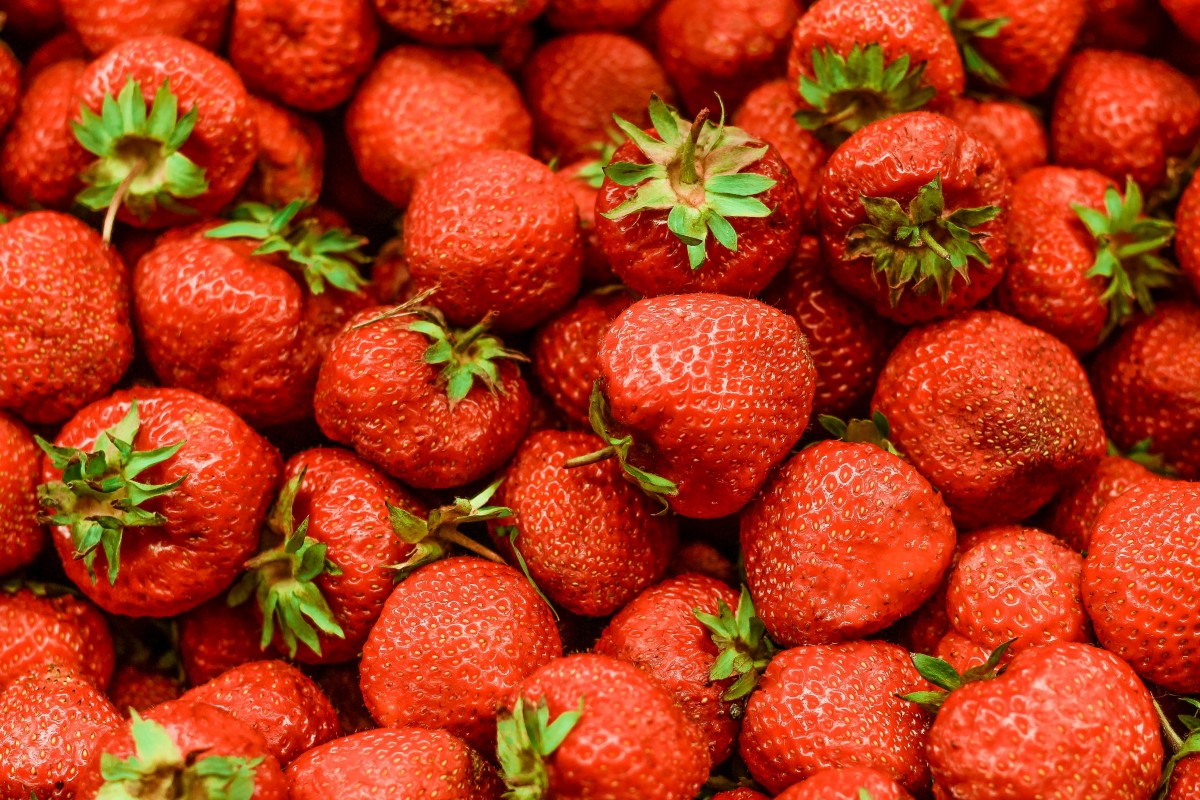

In [16]:
Image(filename='data/MobileNet-samples/3.jpg', width=300, height=200)

In [17]:
preprocessed_image = prepare_image('3.jpg')
predictions = mobile.predict(preprocessed_image)
results = imagenet_utils.decode_predictions(predictions)
results

1/1 [==============================] - 0s 24ms/step


[[('n07745940', 'strawberry', 0.9866174),
  ('n07753275', 'pineapple', 0.003143219),
  ('n07760859', 'custard_apple', 0.0024930993),
  ('n07749582', 'lemon', 0.0012996655),
  ('n07768694', 'pomegranate', 0.0011695803)]]

## Data Preparation
### Sign Language Digits Dataset
Link: https://github.com/ardamavi/Sign-Language-Digits-Dataset

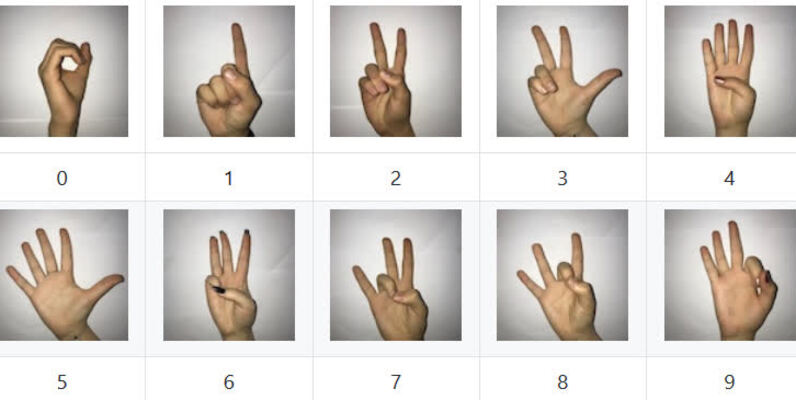

*Image Source: [Kaggle](https://www.kaggle.com/datasets/javaidahmadwani/sign-language-digits-dataset)*

### Organize the data

In [19]:
# Organize data into train, valid, test directories
os.chdir('data/Sign-Language-Digits-Dataset')
if os.path.isdir('train/0/') is False: 
    os.mkdir('train')
    os.mkdir('valid')
    os.mkdir('test')

    for i in range(0, 10):
        shutil.move(f'{i}', 'train')
        os.mkdir(f'valid/{i}')
        os.mkdir(f'test/{i}')

        valid_samples = random.sample(os.listdir(f'train/{i}'), 30)
        for j in valid_samples:
            shutil.move(f'train/{i}/{j}', f'valid/{i}')

        test_samples = random.sample(os.listdir(f'train/{i}'), 5)
        for k in test_samples:
            shutil.move(f'train/{i}/{k}', f'test/{i}')
            
os.chdir('../..')

### Process the data

In [20]:
# Define the path to the training, validation, and test datasets
train_path = 'data/Sign-Language-Digits-Dataset/train'
valid_path = 'data/Sign-Language-Digits-Dataset/valid'
test_path = 'data/Sign-Language-Digits-Dataset/test'

# Create batches of preprocessed images for training, validation, and testing using the MobileNet preprocessing function
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input) \
    .flow_from_directory(directory=train_path, target_size=(224,224), batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input) \
    .flow_from_directory(directory=valid_path, target_size=(224,224), batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input) \
    .flow_from_directory(directory=test_path, target_size=(224,224), batch_size=10, shuffle=False)

Found 1712 images belonging to 10 classes.
Found 300 images belonging to 10 classes.
Found 50 images belonging to 10 classes.


## Build a Model

In [40]:
# Load the MobileNet model with pre-trained weights, excluding the top layers
base_model = tf.keras.applications.mobilenet.MobileNet(input_shape=(224,224,3), include_top=False)

In [41]:
# Print a summary of the base model's architecture
base_model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

In [43]:
# Set the output of the base model as the input for the new layers
x = base_model.output
# Add a global average pooling layer to reduce the spatial dimensions
x = GlobalAveragePooling2D()(x)
# Add a dense (fully connected) layer with 10 units and softmax activation for classification
output = Dense(units=10, activation='softmax')(x)

In [45]:
# Create a new model by specifying the inputs and outputs
model = Model(inputs=base_model.input, outputs=output)

In [46]:
# Freeze (set trainable to False) all layers except the last 23 layers
for layer in model.layers[:-23]:
    layer.trainable = False

In [47]:
# Print a summary of the model's architecture after freezing the layers
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                    

### Train a model

In [48]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [49]:
model.fit(x=train_batches, validation_data=valid_batches, epochs=30, verbose=2)

Epoch 1/30
172/172 - 6s - loss: 0.5934 - accuracy: 0.8218 - val_loss: 0.2657 - val_accuracy: 0.9267 - 6s/epoch - 37ms/step
Epoch 2/30
172/172 - 4s - loss: 0.1106 - accuracy: 0.9866 - val_loss: 0.1227 - val_accuracy: 0.9667 - 4s/epoch - 23ms/step
Epoch 3/30
172/172 - 4s - loss: 0.0528 - accuracy: 0.9947 - val_loss: 0.0819 - val_accuracy: 0.9767 - 4s/epoch - 23ms/step
Epoch 4/30
172/172 - 4s - loss: 0.0321 - accuracy: 0.9977 - val_loss: 0.0775 - val_accuracy: 0.9833 - 4s/epoch - 23ms/step
Epoch 5/30
172/172 - 4s - loss: 0.0207 - accuracy: 0.9988 - val_loss: 0.0639 - val_accuracy: 0.9800 - 4s/epoch - 23ms/step
Epoch 6/30
172/172 - 4s - loss: 0.0227 - accuracy: 0.9982 - val_loss: 0.0637 - val_accuracy: 0.9900 - 4s/epoch - 23ms/step
Epoch 7/30
172/172 - 4s - loss: 0.0123 - accuracy: 0.9994 - val_loss: 0.0603 - val_accuracy: 0.9867 - 4s/epoch - 23ms/step
Epoch 8/30
172/172 - 4s - loss: 0.0132 - accuracy: 0.9982 - val_loss: 0.0591 - val_accuracy: 0.9767 - 4s/epoch - 25ms/step
Epoch 9/30
172/1

### Predict the data

In [50]:
test_labels = test_batches.classes
test_labels

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4,
       4, 4, 4, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 8, 8, 8, 8,
       8, 9, 9, 9, 9, 9])

In [51]:
predictions = model.predict(x=test_batches, verbose=0)
predictions[:5]

array([[9.9999285e-01, 3.9934413e-08, 1.6737040e-09, 1.1092316e-06,
        3.9533470e-06, 5.3706555e-07, 2.1669031e-07, 4.6245494e-10,
        1.2660998e-06, 1.5905012e-07],
       [9.9999702e-01, 2.1837927e-07, 1.0061362e-08, 1.2664559e-07,
        1.6402598e-06, 5.2431577e-08, 5.2169395e-07, 1.6304397e-09,
        1.3207003e-07, 1.9778452e-07],
       [9.9999797e-01, 5.9915010e-08, 1.2533712e-09, 2.3244115e-07,
        1.4663453e-06, 3.5501788e-08, 5.9490265e-08, 1.2789420e-10,
        3.0596400e-08, 3.5336814e-08],
       [9.9999893e-01, 2.5383624e-08, 6.1794196e-09, 6.1736856e-08,
        5.8988564e-07, 7.5530950e-09, 1.7278042e-07, 2.5475072e-10,
        7.0468587e-08, 1.9132054e-07],
       [9.9997830e-01, 1.3367098e-05, 2.0202231e-08, 1.0948081e-06,
        1.7536200e-07, 1.7069386e-08, 6.3702751e-06, 2.7484151e-10,
        2.0548228e-07, 4.7446736e-07]], dtype=float32)

In [52]:
test_batches.class_indices

{'0': 0,
 '1': 1,
 '2': 2,
 '3': 3,
 '4': 4,
 '5': 5,
 '6': 6,
 '7': 7,
 '8': 8,
 '9': 9}

## Evaluate a model's performance

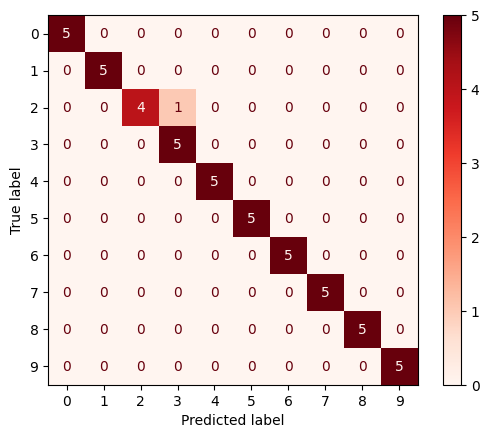

In [56]:
cm_plot_labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

ConfusionMatrixDisplay.from_predictions(
    y_true=test_batches.classes,
    y_pred=np.argmax(predictions, axis=-1),
    cmap=plt.cm.Reds
);

### Summary
Looking at the confusion matrix, we can observe the following:

- `The model achieved perfect accuracy for all digits (0-9)` since the diagonal cells have non-zero values, indicating correct predictions for each digit.
- Each digit (0-9) has a count of 5 in the test dataset, which suggests a balanced distribution of samples.
- `There are no instances of misclassification in the confusion matrix`. All predicted labels align perfectly with the true labels.

From this analysis, we can conclude that `the model performed exceptionally well on the test dataset` for sign language digits classification. It accurately recognized and classified all the digits, achieving a 100% accuracy rate.

*Note: To fully evaluate the model's performance, additional metrics such as precision, recall, and F1 score can be calculated.*

## Data Augmentation

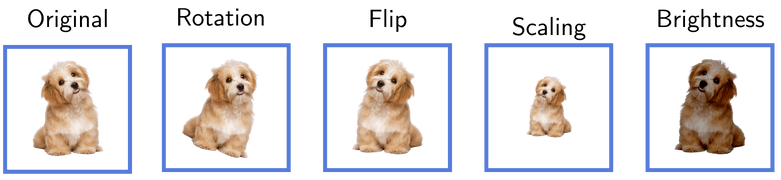

*Image Source: [Baeldung](https://www.baeldung.com/cs/ml-data-augmentation)*

Data augmentation is a technique used in machine learning and computer vision to `expand a dataset by applying various transformations and modifications to the existing data`. 

Its purpose is to `enhance the diversity and variability of the training data`, `improving the model's generalization and robustness`. By introducing variations such as rotations, translations, scaling, flipping, and noise addition, data augmentation generates new samples that resemble the original data but exhibit different appearances. 

This technique `helps prevent overfitting`, as it introduces more variations for the model to learn from and enables better handling of real-world scenarios and unseen examples. Additionally, data augmentation can `address class imbalance issues` by generating additional samples for underrepresented classes, resulting in a more balanced and effective training process.

In [64]:
import matplotlib.pyplot as plt
import numpy as np
import os
import random
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator

In [63]:
# Define a function to plot a set of images
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten() # Flatten the axes array to iterate through the subplots
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

In [65]:
# Define an image data generator with various augmentation techniques
gen = ImageDataGenerator(
    rotation_range=10, # Randomly rotate the images within a range of 10 degrees
    width_shift_range=0.1, # Randomly shift the width of the images by a fraction of 0.1
    height_shift_range=0.1, # Randomly shift the height of the images by a fraction of 0.1
    shear_range=0.15, # Randomly apply shear transformations to the images
    zoom_range=0.1, # Randomly zoom in or out on the images by a factor of 0.1
    channel_shift_range=10, # Randomly shift the color channels of the images by a value of 10
    horizontal_flip=True # Randomly flip the images horizontally
)

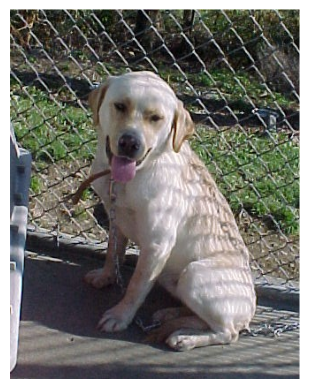

In [83]:
# Choose a random image from the 'dog' category in the training dataset
chosen_image = random.choice(os.listdir('data/dogs-vs-cats/train/dog/'))
image_path = 'data/dogs-vs-cats/train/dog/' + chosen_image

# Read the image and expand its dimensions for compatibility with the generator
image = np.expand_dims(plt.imread(image_path), 0)
plt.axis('off')
plt.imshow(image[0]);

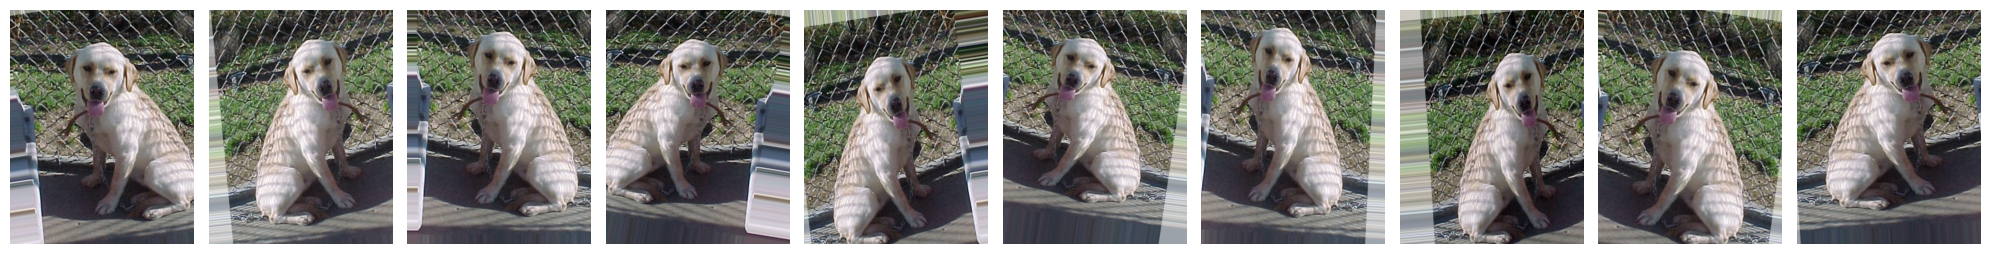

In [84]:
# Generate augmented images based on the chosen image using the image data generator
aug_iter = gen.flow(image)

# Create a list of 10 augmented images by iterating through the generator
aug_images = [next(aug_iter)[0].astype(np.uint8) for _ in range(10)]

# Plot the augmented images
plotImages(aug_images)